In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [38]:
df = pd.read_csv('home_price.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price in usd')

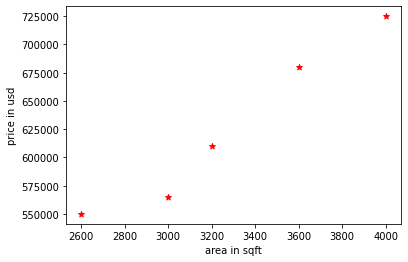

In [39]:
%matplotlib inline
plt.scatter(df.area,df.price,color = 'red',marker='*')
plt.xlabel('area in sqft')
plt.ylabel('price in usd')

In [40]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)
reg.predict(np.array([3300]).reshape(1, 1))

/home/junaid/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [41]:
reg.coef_

array([135.78767123])

In [42]:
reg.intercept_

180616.43835616432

In [43]:
areas = [1200,1800,2300,4600,1500,5200,3600]
d = pd.DataFrame(np.array(areas),columns=['area'])
d

,area
0,1200
1,1800
2,2300
3,4600
4,1500
5,5200
6,3600


In [44]:
reg.predict(d)
d['prices'] = reg.predict(d)

In [45]:
d

,area,prices
0,1200,343561.643836
1,1800,425034.246575
2,2300,492928.082192
3,4600,805239.726027
4,1500,384297.945205
5,5200,886712.328767
6,3600,669452.054795


In [46]:
d.to_csv('predicted_csv')

### Model can be saved to a file, so that it is not required to process data always for the prediction

In [47]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [48]:
# load the pickle model for the prediction

with open('model_pickle', 'rb') as f:
    mod = pickle.load(f)
    

In [49]:
mod.coef_

array([135.78767123])

In [50]:
mod.intercept_

180616.43835616432

In [51]:
mod.predict(np.array([3000]).reshape(1,1))

/home/junaid/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [54]:
import joblib
joblib.dump(reg,'model_joblib')

['model_joblib']

In [55]:
mj = joblib.load('model_joblib')


In [56]:
mj.coef_

array([135.78767123])

In [57]:
mj.intercept_

180616.43835616432

In [58]:
mj.predict(np.array([3000]).reshape(1,1))

/home/junaid/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])